In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from itertools import permutations


# Functions

In [3]:
# functions
def pie_chart(content, titl): 
    # for generating pie charts with title and percentage value
    plt.figure()
    plt.pie(content, labels=content.index, autopct='%1.1f%%')
    plt.title(titl)
    plt.show()

def uni_ana_hist(f, col): 
    # for histograms of univariate analysis, with column name as title
    plt.figure()
    htc = list(f[col])
    plt.hist(htc, align='left')
    plt.title(col)
    plt.show()

def bi_ana_scatter(df, a, b):
    # generate scatter plot for bi-variate analysis. Blue dots for no, orange for yes. 
    plt.figure()
    co = []
    for i in df['response']: 
        if i == 'yes': 
            co.append('orange')
        else: 
            co.append('blue')
    plt.scatter(a,b, c=co, s=2)
    plt.title(a.name+ " vs " +b.name)
    plt.xlabel(a.name)
    plt.ylabel(b.name)
    plt.show()

def double_hist(col): 
    # histogram for single categorical variables only
    # showing numbers in different categories with yes and no result
    ax = sns.countplot(data = df, y = df[col], hue = df['response'], order = df[col].value_counts().index)
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('Count', fontsize = 14)


# Data Preprocessing

In [4]:
# Read Data
df = pd.read_csv('train.csv', delimiter=';')

# show column-wise info of the initial datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# see the first 5 rows of the initial table
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#rename the predict varibale to make its name make sense
df.rename(columns={'y': 'response'},inplace = True)

In [7]:
#Check if there are empty vaules
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

There's no Nan value in all columns. No need for Nan treatment in later stages. 

# Data Exploration

In [8]:
#identify categorical and continous variables
catvari=df.select_dtypes(include=['object']).columns.to_list()
numvari=[col for col in df.columns if col not in catvari]
print('continous Variables: {}'.format(numvari))
print()
print('Categorical Variables: {}'.format(catvari))

continous Variables: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


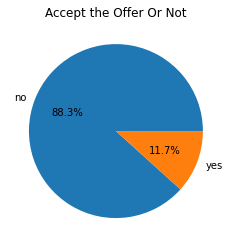

In [9]:
# accept or not accept
yn = df.groupby('response')['response'].count()
pie_chart(yn, 'Accept the Offer Or Not')

## Numerical Analysis

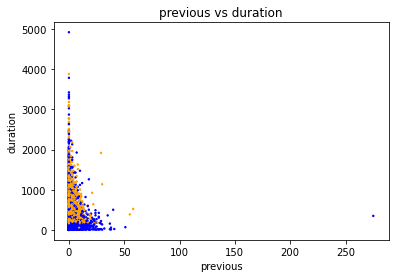

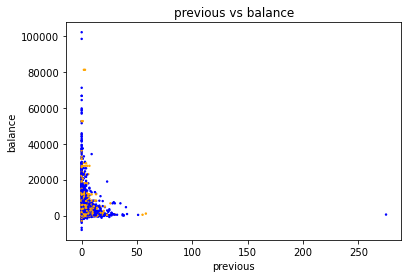

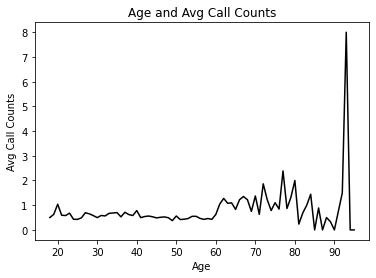

In [10]:
# numerical analysis
bi_ana_scatter(df, df['previous'], df['duration'])
bi_ana_scatter(df, df['previous'], df['balance'])

plt.figure()
plt.plot(df.groupby('age')['previous'].mean(), color='black')
plt.title('Age and Avg Call Counts')
plt.xlabel('Age')
plt.ylabel('Avg Call Counts')
plt.show()


### all combination of numerical visualization

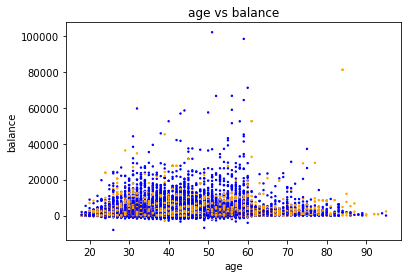

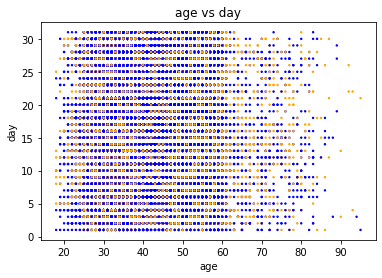

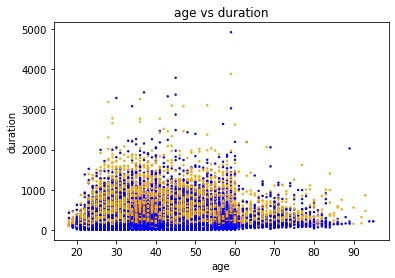

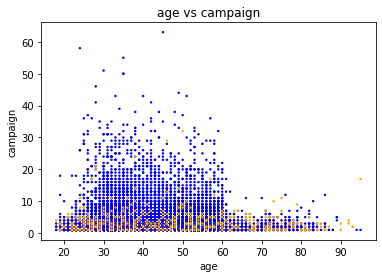

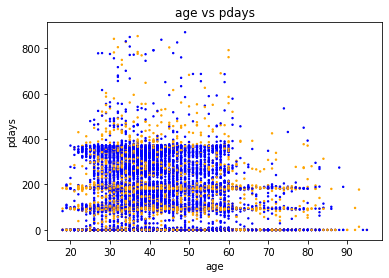

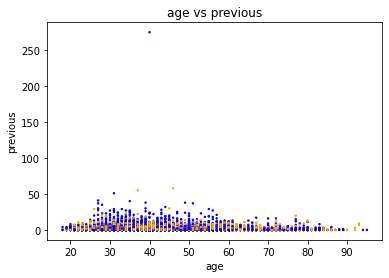

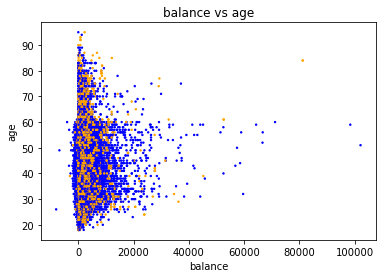

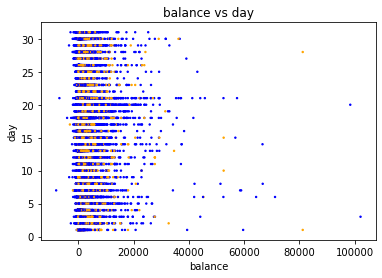

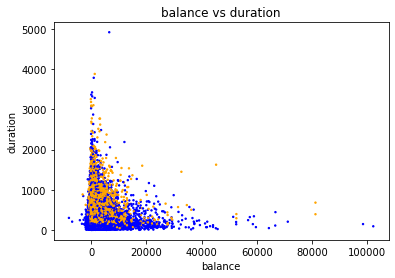

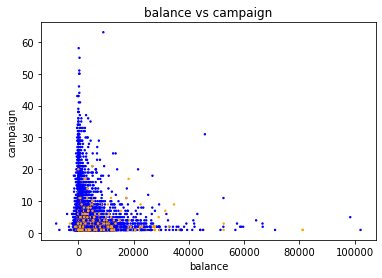

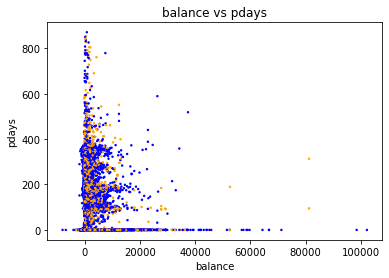

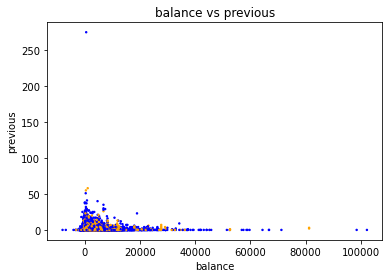

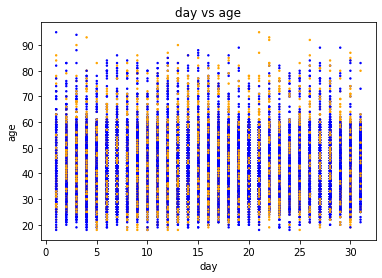

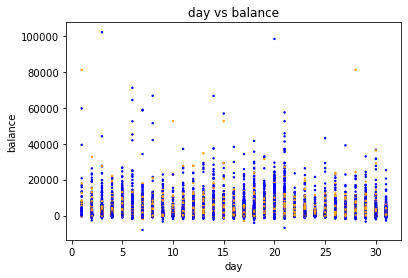

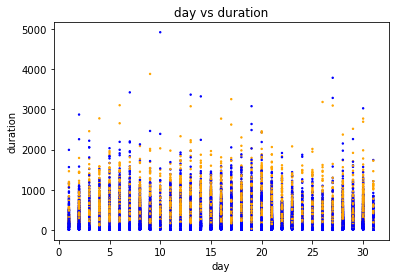

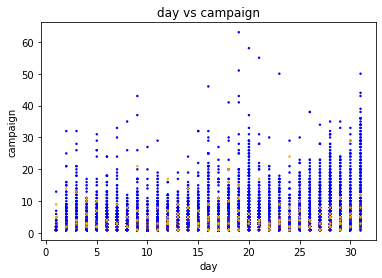

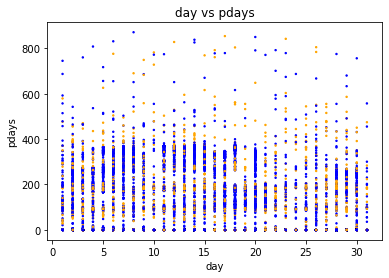

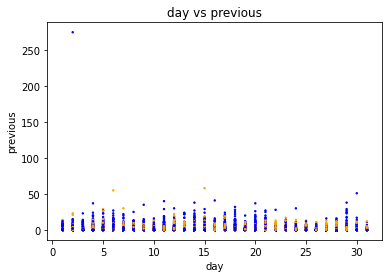

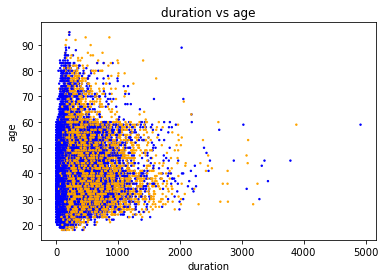

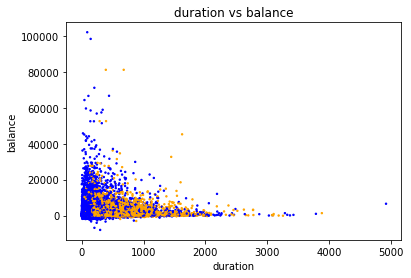

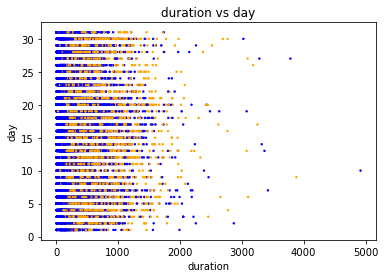

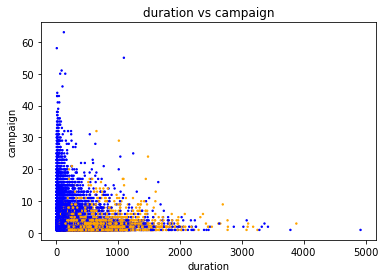

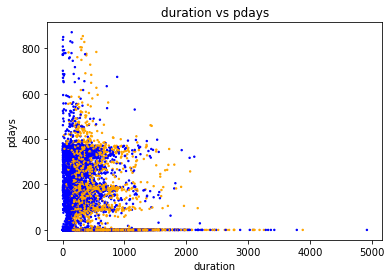

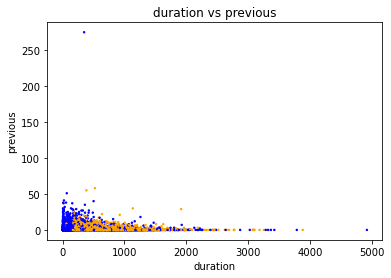

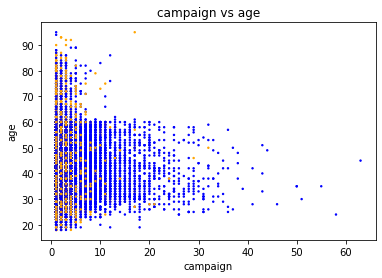

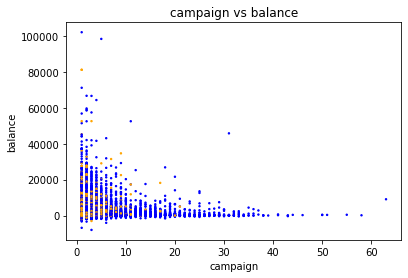

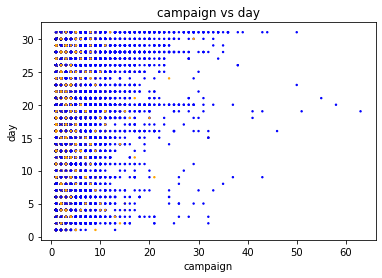

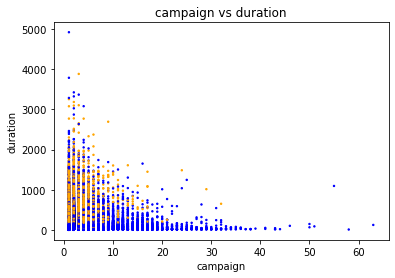

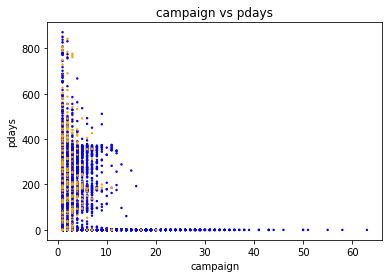

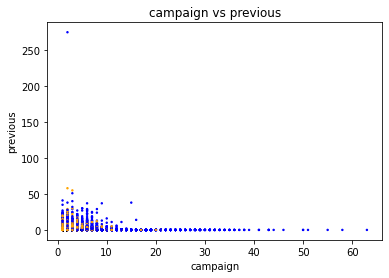

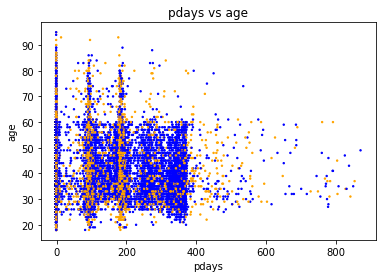

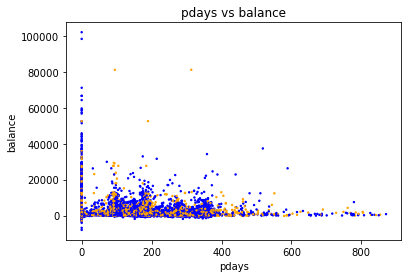

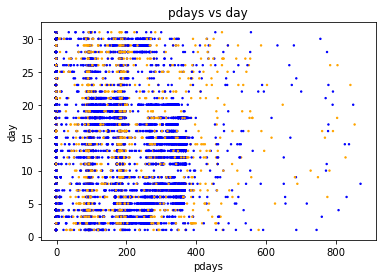

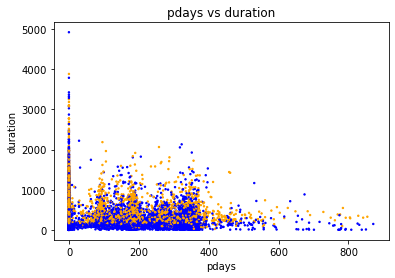

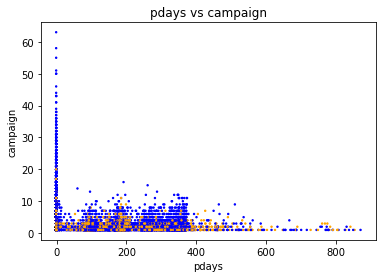

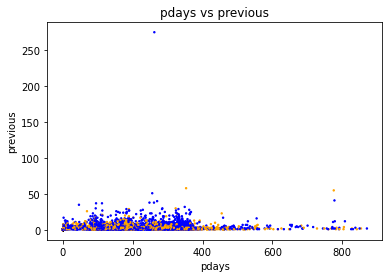

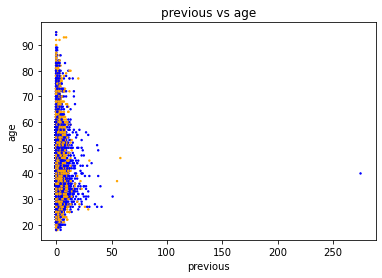

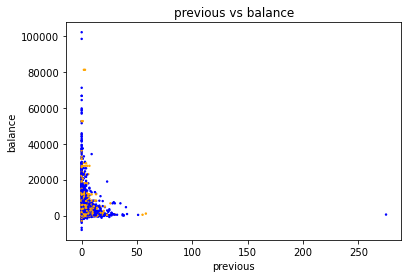

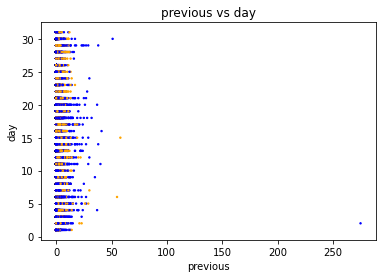

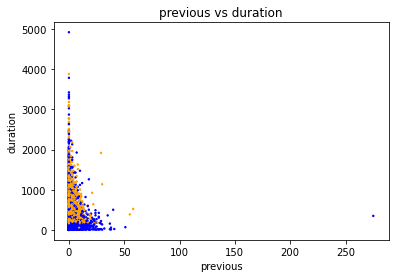

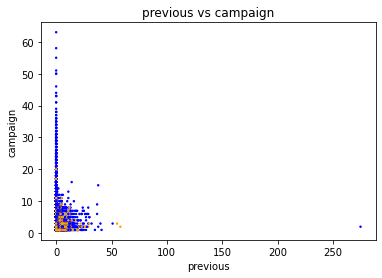

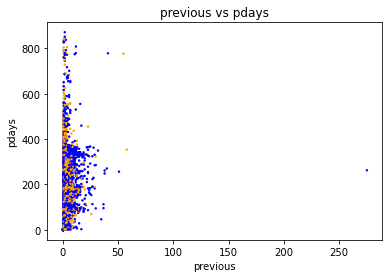

In [11]:
num_per = permutations(numvari, 2)
for i in num_per: 
    bi_ana_scatter(df, df[i[0]], df[i[1]])

## Boxplot for Numerical Outliers

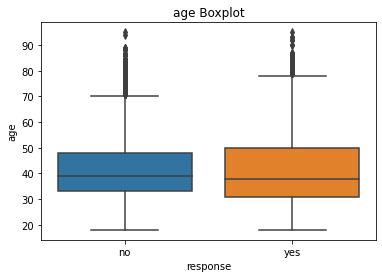

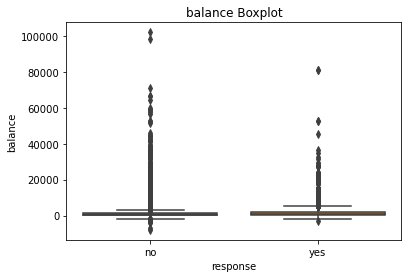

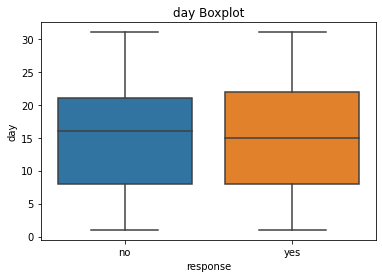

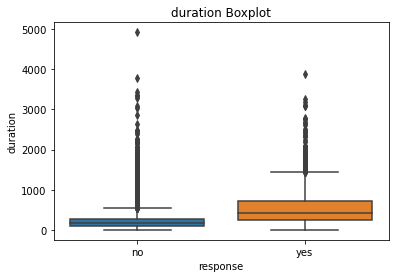

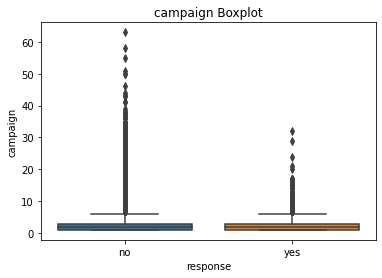

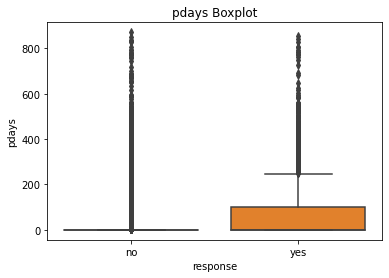

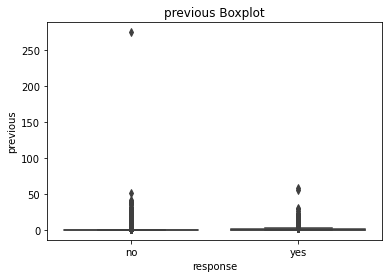

In [12]:

for i in numvari: 
    plt.figure()
    sns.boxplot(data = df, y = df[i], x = df['response'])
    plt.title(i+' Boxplot')
    plt.show()


0        200-300
1        100-200
2          0-100
3          0-100
4        100-200
          ...   
45206        300
45207        300
45208        300
45209        300
45210        300
Name: duration_cat, Length: 45211, dtype: category
Categories (4, object): ['0-100' < '100-200' < '200-300' < '300']


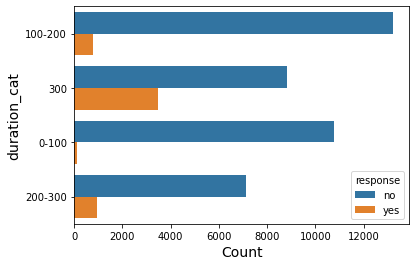

In [13]:
# how numerical variables affect the sub decisions
df['duration_cat'] = pd.cut(x=df['duration'], bins=[0, 100, 200, 300, 9999],labels=['0-100', '100-200', '200-300','300'])
print(df['duration_cat'])
double_hist('duration_cat')

## Categorical Analysis

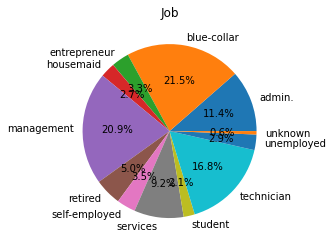

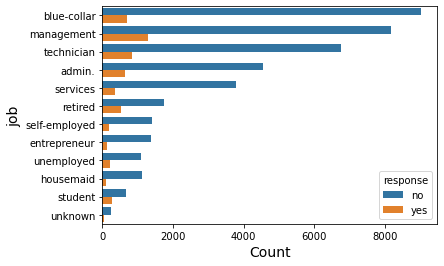

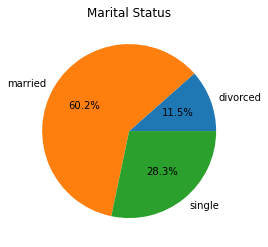

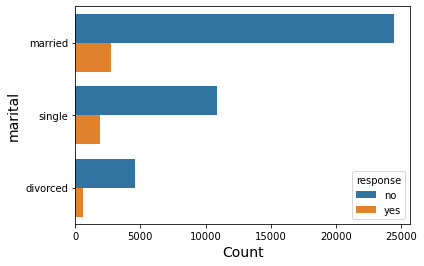

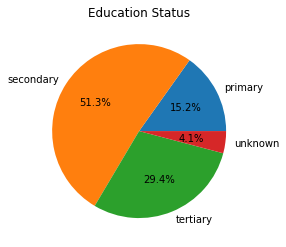

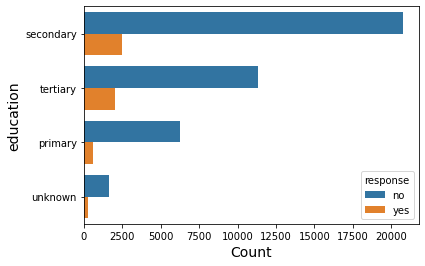

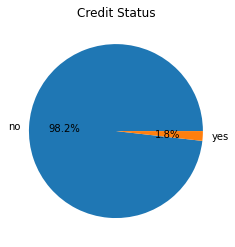

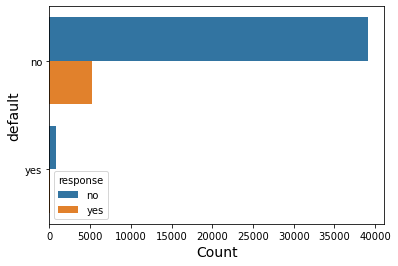

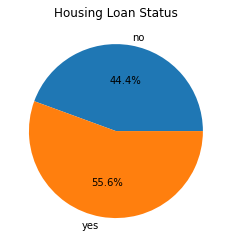

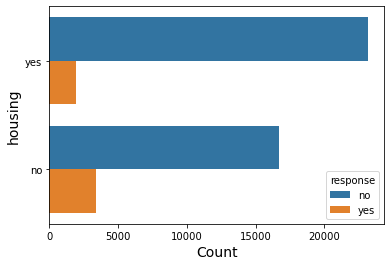

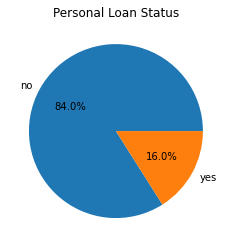

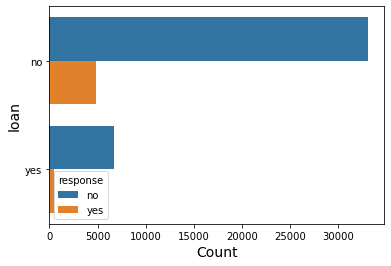

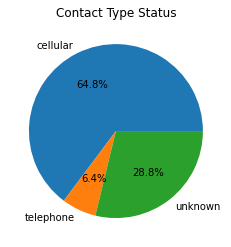

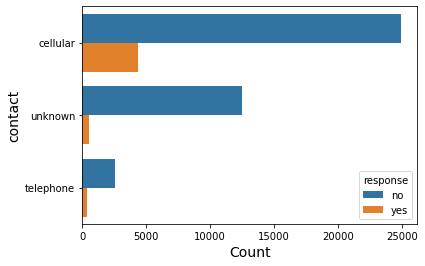

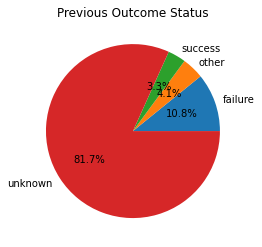

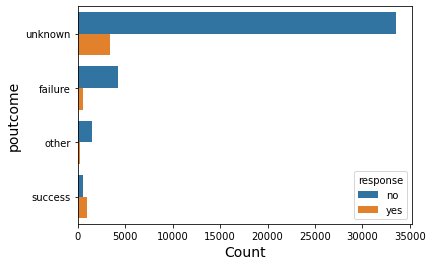

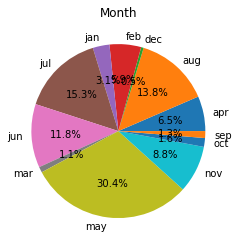

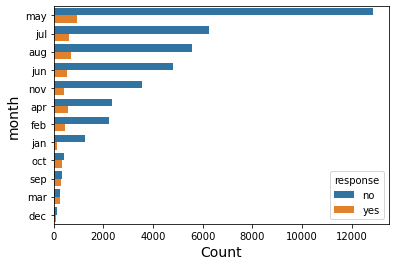

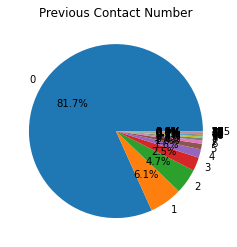

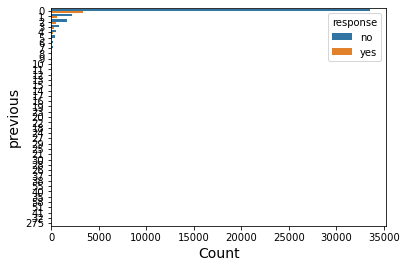

In [14]:
# categorical analysis
pie_chart(df.groupby('job')['job'].count(), 'Job')

# a = f.groupby(['job', 'y'])['y'].count()
# print(a)

double_hist('job')

pie_chart(df.groupby('marital')['marital'].count(), 'Marital Status')
double_hist('marital')
pie_chart(df.groupby('education')['education'].count(), 'Education Status')
double_hist('education')
pie_chart(df.groupby('default')['default'].count(), 'Credit Status')
double_hist('default')
pie_chart(df.groupby('housing')['housing'].count(), 'Housing Loan Status')
double_hist('housing')
pie_chart(df.groupby('loan')['loan'].count(), 'Personal Loan Status')
double_hist('loan')
pie_chart(df.groupby('contact')['contact'].count(), 'Contact Type Status')
double_hist('contact')
pie_chart(df.groupby('poutcome')['poutcome'].count(), 'Previous Outcome Status')
double_hist('poutcome')
pie_chart(df.groupby('month')['month'].count(), 'Month')
double_hist('month')
pie_chart(df.groupby('previous')['previous'].count(), 'Previous Contact Number')
double_hist('previous')







# Add more Data for Better result

In [15]:
df_test = pd.read_csv('test.csv', delimiter=';')
df_test.rename(columns={'y': 'response'},inplace = True)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [16]:
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [17]:
df = df.append(df_test)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,duration_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,200-300
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,100-200
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0-100
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0-100
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,100-200
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,100-200
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,200-300
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,300
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0-100
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0-100


# Correlation

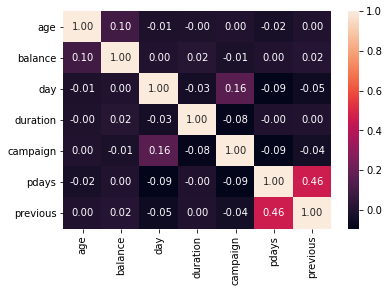

In [18]:
correlation = df.corr()
plt.figure()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.show()


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


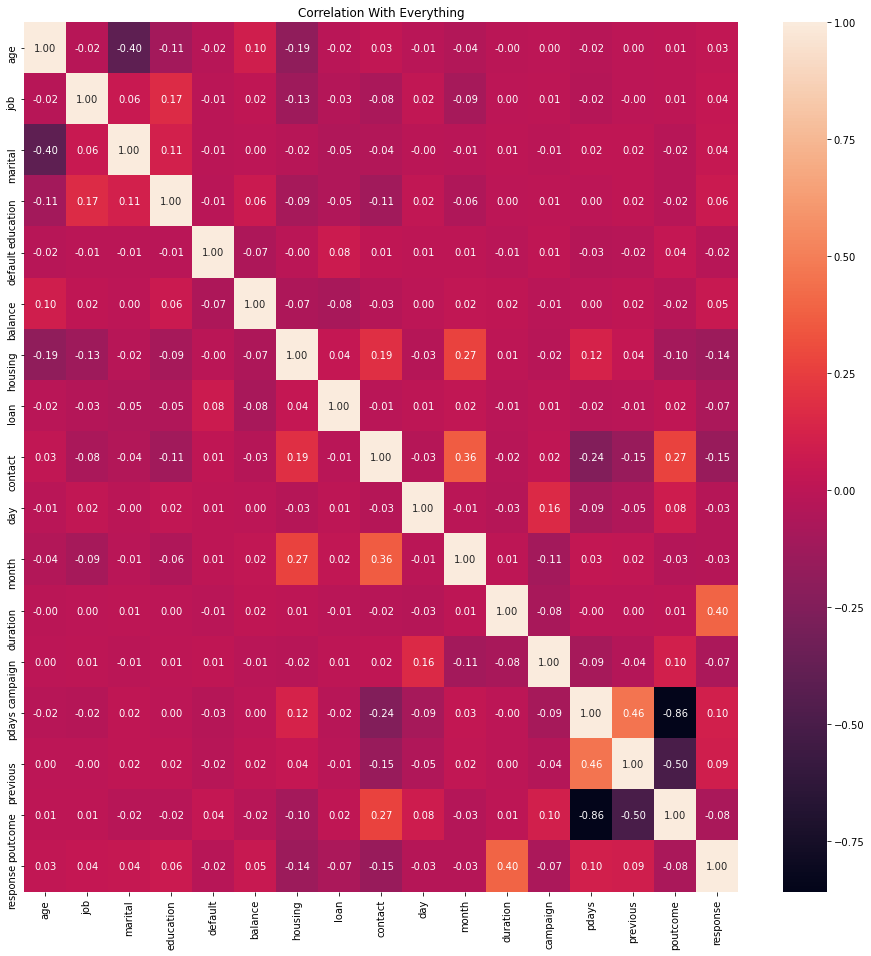

In [19]:
# all categorical variables: catvari
# 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response'
le = LabelEncoder()
df_all_num = df.copy()
print(catvari)
for i in catvari: 
    df_all_num[i] = le.fit_transform(df_all_num[i])
# df_all_num.head(10)
plt.figure(figsize=(16,16))
correlation2 = df_all_num.corr()
sns.heatmap(correlation2, annot=True, fmt=".2f")
plt.title('Correlation With Everything')
plt.show()

# Model Building & Evaluation

In [20]:
!pip install lightgbm==3.3.3

     |████████████████████████████████| 1.3 MB 8.7 MB/s eta 0:00:01


In [22]:
#import necessary libaries
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
import lightgbm as lgb
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

In [23]:
#Convert some categorical variables to numberical variables
df1 = df.copy()
df1['job'] = pd.factorize(df1['job'])[0]
df1['marital'] = pd.factorize(df1['marital'])[0]
df1['education'] = pd.factorize(df1['education'])[0]
df1['default'] = pd.factorize(df1['default'])[0]
df1['housing'] = pd.factorize(df1['housing'])[0]
df1['loan'] = pd.factorize(df1['loan'])[0]
df1['poutcome'] = pd.factorize(df1['poutcome'])[0]
df1['contact'] = pd.factorize(df1['contact'])[0]
df1['response'] = pd.factorize(df1['response'])[0]
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,duration_cat
0,58,0,0,0,0,2143,0,0,0,5,may,261,1,-1,0,0,0,200-300
1,44,1,1,1,0,29,0,0,0,5,may,151,1,-1,0,0,0,100-200
2,33,2,0,1,0,2,0,1,0,5,may,76,1,-1,0,0,0,0-100
3,47,3,0,2,0,1506,0,0,0,5,may,92,1,-1,0,0,0,0-100
4,33,4,1,2,0,1,1,0,0,5,may,198,1,-1,0,0,0,100-200


## Models for Numerical Variables

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13206
           1       0.64      0.43      0.51      1714

    accuracy                           0.91     14920
   macro avg       0.78      0.70      0.73     14920
weighted avg       0.90      0.91      0.90     14920



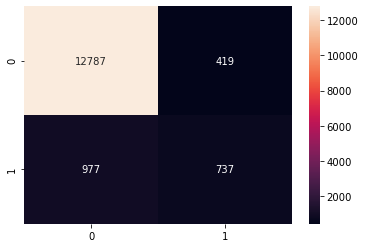

In [24]:
#Train Model
#RandomForest
X = df1[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y = df1['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
class_rf_num = RandomForestClassifier(random_state = 42)
class_rf_num.fit(X_train, y_train)
y_predict_rdf = class_rf_num.predict(X_test)
print(y_predict_rdf)
 
cm = confusion_matrix(y_test, y_predict_rdf)
sns.heatmap(cm, annot = True, fmt = 'd')
print(classification_report(y_test, y_predict_rdf))

/Users/stofzuiger/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13206
           1       0.57      0.17      0.26      1714

    accuracy                           0.89     14920
   macro avg       0.74      0.57      0.60     14920
weighted avg       0.86      0.89      0.86     14920



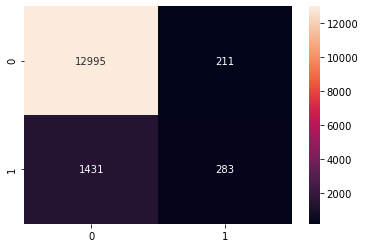

In [25]:
#logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)


class_lr_num = LogisticRegression(random_state = 42, solver='lbfgs', max_iter=200)
class_lr_num.fit(X_train, y_train)
y_predict_logistic = class_lr_num.predict(X_test)
print(y_predict_logistic)

cm = confusion_matrix(y_test, y_predict_logistic)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_predict_logistic))

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13206
           1       0.62      0.41      0.49      1714

    accuracy                           0.90     14920
   macro avg       0.77      0.69      0.72     14920
weighted avg       0.89      0.90      0.89     14920



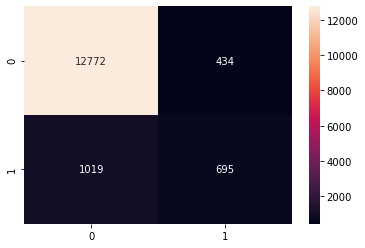

In [26]:
#lgb
class_lgb_num = lgb.LGBMClassifier(learning_rate= 0.01,n_estimators=1000)
class_lgb_num.fit(X_train, y_train)
y_predict_lgb = class_lgb_num.predict(X_test)
print(y_predict_lgb)

cm = confusion_matrix(y_test, y_predict_lgb)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_predict_lgb))

## Models for Categorical Variables

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     13206
           1       0.56      0.27      0.36      1714

    accuracy                           0.89     14920
   macro avg       0.74      0.62      0.65     14920
weighted avg       0.87      0.89      0.87     14920



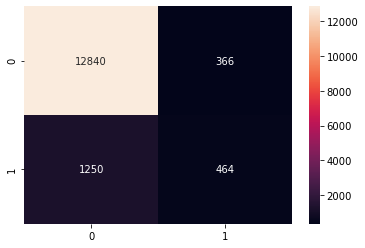

In [27]:
#Train Model
#RandomForest
catvari_ana = catvari[:-1]
print(catvari_ana)
X = df_all_num.loc[:, catvari_ana]
y = df_all_num['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
class_rf_cat = RandomForestClassifier(random_state = 42)
class_rf_cat.fit(X_train, y_train)
y_predict_rdf = class_rf_cat.predict(X_test)
print(y_predict_rdf)
 
cm = confusion_matrix(y_test, y_predict_rdf)
sns.heatmap(cm, annot = True, fmt = 'd')
print(classification_report(y_test, y_predict_rdf))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13206
           1       0.00      0.00      0.00      1714

    accuracy                           0.89     14920
   macro avg       0.44      0.50      0.47     14920
weighted avg       0.78      0.89      0.83     14920



/Users/stofzuiger/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


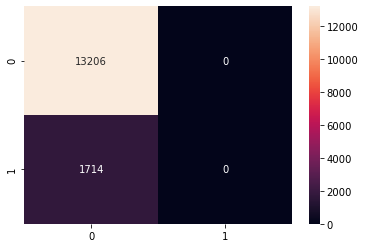

In [28]:
#logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)


class_lr_cat = LogisticRegression(random_state = 42, solver='lbfgs', max_iter=200)
class_lr_cat.fit(X_train, y_train)
y_predict_logistic = class_lr_cat.predict(X_test)
print(y_predict_logistic)

cm = confusion_matrix(y_test, y_predict_logistic)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_predict_logistic))

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     13206
           1       0.64      0.21      0.31      1714

    accuracy                           0.90     14920
   macro avg       0.77      0.60      0.63     14920
weighted avg       0.88      0.90      0.87     14920



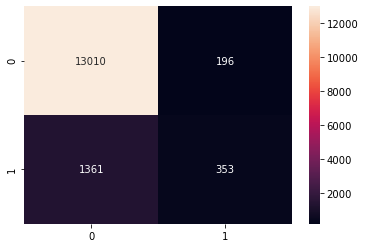

In [29]:
#lgb
class_lgb_cat = lgb.LGBMClassifier(learning_rate= 0.01,n_estimators=1000)
class_lgb_cat.fit(X_train, y_train)
y_predict_lgb = class_lgb_cat.predict(X_test)
print(y_predict_lgb)

cm = confusion_matrix(y_test, y_predict_lgb)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_predict_lgb))

## Models for All Variables

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13206
           1       0.69      0.50      0.58      1714

    accuracy                           0.92     14920
   macro avg       0.81      0.74      0.77     14920
weighted avg       0.91      0.92      0.91     14920



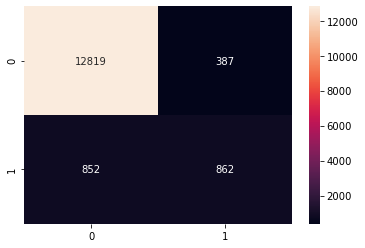

In [30]:
#Train Model
#RandomForest
catvari_ana = catvari[:-1]
print(catvari_ana)
X = df_all_num.loc[:, numvari+catvari_ana]
y = df_all_num['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
class_rf_all = RandomForestClassifier(random_state = 42)
class_rf_all.fit(X_train, y_train)
y_predict_rdf = class_rf_all.predict(X_test)
print(y_predict_rdf)
 
cm = confusion_matrix(y_test, y_predict_rdf)
sns.heatmap(cm, annot = True, fmt = 'd')
print(classification_report(y_test, y_predict_rdf))

/Users/stofzuiger/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13206
           1       0.55      0.20      0.29      1714

    accuracy                           0.89     14920
   macro avg       0.73      0.59      0.62     14920
weighted avg       0.86      0.89      0.87     14920



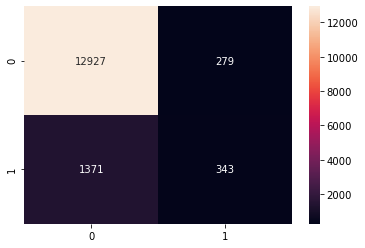

In [31]:
#logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)


class_lr_all = LogisticRegression(random_state = 42, solver='lbfgs', max_iter=200)
class_lr_all.fit(X_train, y_train)
y_predict_logistic = class_lr_all.predict(X_test)
print(y_predict_logistic)

cm = confusion_matrix(y_test, y_predict_logistic)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_predict_logistic))

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13206
           1       0.65      0.49      0.56      1714

    accuracy                           0.91     14920
   macro avg       0.79      0.73      0.75     14920
weighted avg       0.90      0.91      0.91     14920



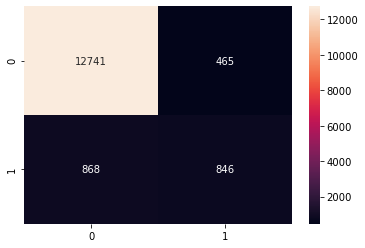

In [32]:
#lgb
class_lgb_all = lgb.LGBMClassifier(learning_rate= 0.01,n_estimators=1000)
class_lgb_all.fit(X_train, y_train)
y_predict_lgb = class_lgb_all.predict(X_test)
print(y_predict_lgb)

cm = confusion_matrix(y_test, y_predict_lgb)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_predict_lgb))

# Dummy Testing

In [33]:
df_dummy = df.copy()
dummy1 = df_dummy.iloc[[105]]
print(dummy1)
dummy1['age'] = 25
dummy1['job'] = 'student'
dummy1['marital'] = 'single'
dummy1['education'] = 'tertiary'
dummy1['default'] = 'no'
dummy1['balance'] = 60000
dummy1['housing'] = 'no'
dummy1['loan'] = 'no'
dummy1['contact'] = 'cellular'
dummy1['day'] = 10
dummy1['month'] = 'may'
dummy1['duration'] = 60
dummy1['campaign'] = 1
dummy1['pdays'] = -1
dummy1['previous'] = 0
dummy1['poutcome'] = 'unknown'

dummy2 = df_dummy.iloc[[105]]
dummy2['age'] = 24
dummy2['job'] = 'student'
dummy2['marital'] = 'single'
dummy2['education'] = 'tertiary'
dummy2['default'] = 'no'
dummy2['balance'] = 100000
dummy2['housing'] = 'no'
dummy2['loan'] = 'no'
dummy2['contact'] = 'cellular'
dummy2['day'] = 15
dummy2['month'] = 'dec'
dummy2['duration'] = 30
dummy2['campaign'] = 1
dummy2['pdays'] = -1
dummy2['previous'] = 0
dummy2['poutcome'] = 'unknown'

dfd = df_dummy.append(dummy1)
dfd = dfd.append(dummy2)

dfd['job'] = pd.factorize(dfd['job'])[0]
dfd['marital'] = pd.factorize(dfd['marital'])[0]
dfd['education'] = pd.factorize(dfd['education'])[0]
dfd['default'] = pd.factorize(dfd['default'])[0]
dfd['housing'] = pd.factorize(dfd['housing'])[0]
dfd['loan'] = pd.factorize(dfd['loan'])[0]
dfd['poutcome'] = pd.factorize(dfd['poutcome'])[0]
dfd['contact'] = pd.factorize(dfd['contact'])[0]
dfd['response'] = pd.factorize(dfd['response'])[0]
dfd['month'] = pd.factorize(dfd['month'])[0]

# dummy1.drop(['response'], axis=1, inplace=True)
# dummy1.drop(['duration_cat'], axis=1, inplace=True)

     age          job  marital  education default  balance housing loan  \
105   44  blue-collar  married  secondary      no       54     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
105  unknown    5   may       197         1     -1         0  unknown   

    response duration_cat  
105       no      100-200  


<ipython-input-33-43432cc2a6d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy1['age'] = 25
<ipython-input-33-43432cc2a6d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy1['job'] = 'student'
<ipython-input-33-43432cc2a6d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [34]:
dfd.info

<bound method DataFrame.info of       age  job  marital  education  default  balance  housing  loan  contact  \
0      58    0        0          0        0     2143        0     0        0   
1      44    1        1          1        0       29        0     0        0   
2      33    2        0          1        0        2        0     1        0   
3      47    3        0          2        0     1506        0     0        0   
4      33    4        1          2        0        1        1     0        0   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4518   57    1        0          1        0      295        1     0        1   
4519   28    3        0          1        0     1137        1     0        1   
4520   44    2        1          0        0     1136        0     1        1   
105    25   11        1          0        0    60000        1     0        1   
105    24   11        1          0        0   100000        1     0        1   

      d

In [35]:
dummy1 = dfd.iloc[-2:]
print(dummy1)
# dummy = dummy1.append(dummy2)
# print(dummy)

     age  job  marital  education  default  balance  housing  loan  contact  \
105   25   11        1          0        0    60000        1     0        1   
105   24   11        1          0        0   100000        1     0        1   

     day  month  duration  campaign  pdays  previous  poutcome  response  \
105   10      0        60         1     -1         0         0         0   
105   15      6        30         1     -1         0         0         0   

    duration_cat  
105      100-200  
105      100-200  


In [36]:
dummy1.axes

[Int64Index([105, 105], dtype='int64'),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'response', 'duration_cat'],
       dtype='object')]

In [37]:
# dummy fitting
dummy1_num = dummy1[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
dummy1_cat = dummy1[['job','marital','education','default','housing','loan','contact','month','poutcome']]
dummy1_all = dummy1.loc[:, numvari+catvari_ana]

dummy1_rf_num = class_rf_num.predict(dummy1_num)
dummy1_lr_num = class_lr_num.predict(dummy1_num)
dummy1_lgb_num = class_lgb_num.predict(dummy1_num)

dummy1_rf_cat = class_rf_cat.predict(dummy1_cat)
dummy1_lr_cat = class_lr_cat.predict(dummy1_cat)
dummy1_lgb_cat = class_lgb_cat.predict(dummy1_cat)

dummy1_rf_all = class_rf_all.predict(dummy1_all)
dummy1_lr_all = class_lr_all.predict(dummy1_all)
dummy1_lgb_all = class_lgb_all.predict(dummy1_all)

print('Numerical Model Prediction: ')
print(dummy1_rf_num)
print(dummy1_lr_num)
print(dummy1_lgb_num)
print('')
print('Categorical Model Prediction: ')
print(dummy1_rf_cat)
print(dummy1_lr_cat)
print(dummy1_lgb_cat)
print('')
print('Full Model Prediction: ')
print(dummy1_rf_all)
print(dummy1_lr_all)
print(dummy1_lgb_all)

Numerical Model Prediction: 
[0 0]
[0 1]
[0 0]

Categorical Model Prediction: 
[0 0]
[0 0]
[0 0]

Full Model Prediction: 
[0 0]
[0 1]
[0 0]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e89f0cd-ee28-4998-b6af-a4f750c4e8ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>